<a href="https://colab.research.google.com/github/eduswiss/deep-learning-with-tensorflow/blob/master/notebooks/15_lenet_in_tensorflow_for_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep CNN in TensorFlow for Fashion MNIST

In this notebook, we adapt our LeNet-5-inspired CNN for classifying Fashion MNIST images.

## Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist # new!
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

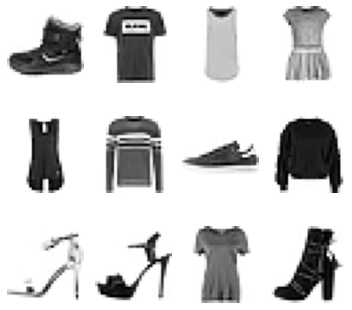

In [3]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

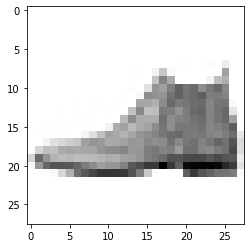

In [4]:
plt.imshow(X_valid[0], cmap='Greys')

In [5]:
y_valid[0]

9

## Preprocess data

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [7]:
X_train /= 255
X_valid /= 255

In [8]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

## Design neural network architecture

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Configure model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## Train!

In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

469/469 [==============================] - 158s 337ms/step - loss: 0.5054 - accuracy: 0.8242 - val_loss: 0.3415 - val_accuracy: 0.8735


## Performing inference

In [13]:
valid_0 = X_valid[0].reshape(1, 28, 28, 1)

In [14]:
model.predict(valid_0)

array([[2.0719392e-05, 1.2682190e-05, 8.7152737e-05, 3.8157381e-05,
        1.7775688e-05, 2.0113876e-03, 3.0463347e-05, 6.9824338e-02,
        1.3741498e-03, 9.2658311e-01]], dtype=float32)

In [16]:
model.predict_classes(valid_0)

array([9])